In [4]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ----------------- ---------------------- 17.0/39.5 MB 97.5 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 109.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\12905\anaconda3\python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [8]:
# load dataset
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


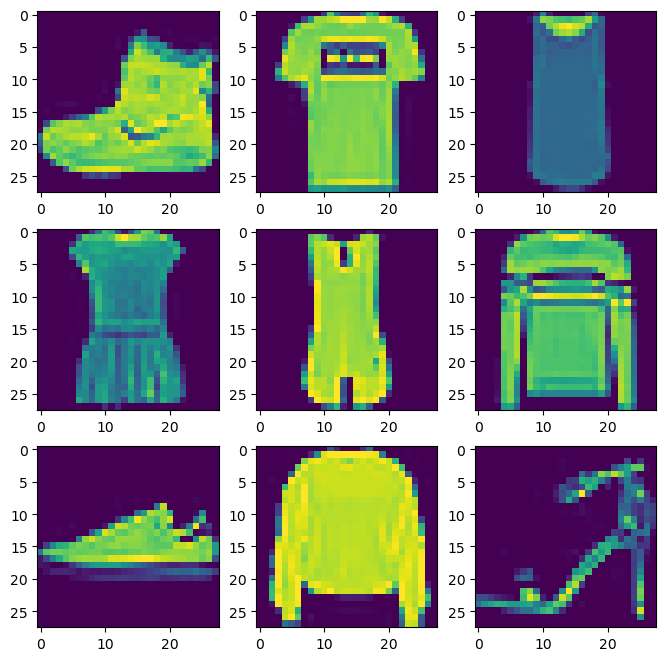

In [15]:
#visualize images
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
def plotdata(images,num):
    plt.figure(figsize=(8,8))
    for i in range(num):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
    plt.show()

plotdata(xtrain,9)

SIFT

In [17]:
def extract_features(image):
    features=[]
    for i in image:
        keypoint,descriptor=sift.detectAndCompute(i,None)
        if descriptor is not None:
            features.append(np.mean(descriptor,axis=0))
        else:
            features.append(np.zeros(128))
    return np.array(features)

# create SIFT feature extractor
sift = cv2.SIFT_create()

In [19]:
xtrain_sift =extract_features(xtrain)
xtest_sift =extract_features(xtest)

In [23]:
scaler=StandardScaler()
xtrain_sift=scaler.fit_transform(xtrain_sift)
xtest_sift=scaler.transform(xtest_sift)

In [25]:
y_trainc=to_categorical(ytrain,10)
y_testc=to_categorical(ytest,10)

In [27]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

C:\Users\12905\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(xtrain_sift,y_trainc,epochs=20,batch_size=32,validation_data=(xtest_sift,y_testc))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5164 - loss: 1.4208 - val_accuracy: 0.6195 - val_loss: 1.0995
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6199 - loss: 1.1151 - val_accuracy: 0.6372 - val_loss: 1.0498
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6357 - loss: 1.0536 - val_accuracy: 0.6486 - val_loss: 1.0211
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6478 - loss: 1.0140 - val_accuracy: 0.6543 - val_loss: 1.0048
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6631 - loss: 0.9665 - val_accuracy: 0.6540 - val_loss: 0.9888
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6738 - loss: 0.9429 - val_accuracy: 0.6635 - val_loss: 0.9810
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6829 - loss: 0.9099 - val_accuracy: 0.6668 - val_loss: 0.9730
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6845 - loss: 0.9067 - 

In [33]:
tloss,tacc=model.evaluate(xtest_sift,y_testc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.6751 - loss: 0.9648


In [35]:
print(f'test_accuracy:{tacc*100: .2f}%')

test_accuracy: 67.49%


### Combination 2: change the hyperparameter to LR  = 0.1 ; batch size =4  optimizer = SGD , activation function. = sigmoid and the loss function is MAE

In [37]:
model=Sequential([
    Dense(512,activation='sigmoid',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='sigmoid',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='sigmoid'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [39]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss='mae',metrics=['accuracy'])

In [41]:
model.fit(xtrain_sift,y_trainc,epochs=4,batch_size=4,validation_data=(xtest_sift,y_testc))

Epoch 1/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 8s 533us/step - accuracy: 0.1086 - loss: 0.1789 - val_accuracy: 0.2372 - val_loss: 0.1603
Epoch 2/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 8s 506us/step - accuracy: 0.2385 - loss: 0.1556 - val_accuracy: 0.2638 - val_loss: 0.1479
Epoch 3/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 8s 508us/step - accuracy: 0.2629 - loss: 0.1482 - val_accuracy: 0.2682 - val_loss: 0.1464
Epoch 4/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 8s 528us/step - accuracy: 0.2964 - loss: 0.1429 - val_accuracy: 0.3273 - val_loss: 0.1361


In [43]:
tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.3282 - loss: 0.1360
test_accuracy: 32.73%


### combination 3: tanh , rmsprop, 16, 0.01, MSE

In [45]:
model=Sequential([
    Dense(512,activation='tanh',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='tanh',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='tanh'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [47]:
from tensorflow.keras.optimizers import RMSprop

In [49]:
model.compile(optimizer= RMSprop(learning_rate=0.01),loss='mse',metrics=['accuracy'])

In [51]:
model.fit(xtrain_sift,y_trainc,epochs=16,batch_size=16,validation_data=(xtest_sift,y_testc))

Epoch 1/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 853us/step - accuracy: 0.4143 - loss: 0.0798 - val_accuracy: 0.4575 - val_loss: 0.0775
Epoch 2/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - accuracy: 0.4688 - loss: 0.0743 - val_accuracy: 0.4697 - val_loss: 0.0717
Epoch 3/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - accuracy: 0.4702 - loss: 0.0745 - val_accuracy: 0.5010 - val_loss: 0.0703
Epoch 4/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 822us/step - accuracy: 0.4682 - loss: 0.0750 - val_accuracy: 0.4714 - val_loss: 0.0708
Epoch 5/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 826us/step - accuracy: 0.4702 - loss: 0.0747 - val_accuracy: 0.4799 - val_loss: 0.0694
Epoch 6/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 824us/step - accuracy: 0.4763 - loss: 0.0741 - val_accuracy: 0.5200 - val_loss: 0.0709
Epoch 7/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 828us/step - accuracy: 0.4806 - loss: 0.0741 - val_accuracy: 0.5048 - val_loss: 0.0722
Epoch 8/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 823us/step - accuracy: 0.4829 -

In [53]:
tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5134 - loss: 0.0710
test_accuracy: 51.54%


### combination 4: 0.001 , batch 8 , sgd ,  sigmoid, huber loss function

In [55]:
model=Sequential([
    Dense(512,activation='sigmoid',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='sigmoid',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='sigmoid'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [57]:
model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.001),loss=tf.keras.losses.Huber(),metrics=['accuracy'])

In [59]:
model.fit(xtrain_sift,y_trainc,epochs=8,batch_size=8,validation_data=(xtest_sift,y_testc))

Epoch 1/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 619us/step - accuracy: 0.1003 - loss: 0.0462 - val_accuracy: 0.1000 - val_loss: 0.0453
Epoch 2/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 591us/step - accuracy: 0.0996 - loss: 0.0459 - val_accuracy: 0.1226 - val_loss: 0.0452
Epoch 3/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 603us/step - accuracy: 0.0997 - loss: 0.0458 - val_accuracy: 0.1116 - val_loss: 0.0451
Epoch 4/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 644us/step - accuracy: 0.0995 - loss: 0.0457 - val_accuracy: 0.1065 - val_loss: 0.0451
Epoch 5/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 602us/step - accuracy: 0.1039 - loss: 0.0456 - val_accuracy: 0.1136 - val_loss: 0.0450
Epoch 6/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 741us/step - accuracy: 0.1010 - loss: 0.0456 - val_accuracy: 0.1164 - val_loss: 0.0450
Epoch 7/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 594us/step - accuracy: 0.0987 - loss: 0.0456 - val_accuracy: 0.1176 - val_loss: 0.0450
Epoch 8/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 593us/step - accuracy: 0.0980 - loss: 0

In [62]:
tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.1264 - loss: 0.0450
test_accuracy: 12.18%


## this is for tuneing for task 1

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


# load dataset
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()

def extract_features(image):
    features=[]
    for i in image:
        keypoint,descriptor=sift.detectAndCompute(i,None)
        if descriptor is not None:
            features.append(np.mean(descriptor,axis=0))
        else:
            features.append(np.zeros(128))
    return np.array(features)

# create SIFT feature extractor
sift = cv2.SIFT_create()

xtrain_sift =extract_features(xtrain)
xtest_sift =extract_features(xtest)
scaler=StandardScaler()
xtrain_sift=scaler.fit_transform(xtrain_sift)
xtest_sift=scaler.transform(xtest_sift)
y_trainc=to_categorical(ytrain,10)
y_testc=to_categorical(ytest,10)

try1

In [11]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=20,batch_size=32,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5172 - loss: 1.4230 - val_accuracy: 0.6249 - val_loss: 1.0935
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6192 - loss: 1.1154 - val_accuracy: 0.6382 - val_loss: 1.0428
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6397 - loss: 1.0474 - val_accuracy: 0.6521 - val_loss: 1.0014
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6536 - loss: 1.0066 - val_accuracy: 0.6517 - val_loss: 0.9995
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6646 - loss: 0.9723 - val_accuracy: 0.6582 - val_loss: 0.9766
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6724 - loss: 0.9439 - val_accuracy: 0.6616 - val_loss: 0.9672
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6783 - loss: 0.9163 - val_accuracy: 0.6664 - val_loss: 0.9622
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6875 - loss: 0.9011 - 

try2

In [20]:
model=Sequential([
    Dense(1024,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=32,batch_size=32,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5311 - loss: 1.3766 - val_accuracy: 0.6221 - val_loss: 1.0887
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6229 - loss: 1.1004 - val_accuracy: 0.6414 - val_loss: 1.0404
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6427 - loss: 1.0404 - val_accuracy: 0.6454 - val_loss: 1.0241
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6558 - loss: 0.9918 - val_accuracy: 0.6546 - val_loss: 0.9983
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6679 - loss: 0.9583 - val_accuracy: 0.6616 - val_loss: 0.9868
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6780 - loss: 0.9291 - val_accuracy: 0.6588 - val_loss: 0.9803
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6849 - loss: 0.9015 - val_accuracy: 0.6682 - val_loss: 0.9646
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6957 - loss: 0.8678 - 

try3

In [22]:
model=Sequential([
    Dense(1024,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=32,batch_size=32,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5373 - loss: 1.3617 - val_accuracy: 0.6106 - val_loss: 1.1255
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6189 - loss: 1.1056 - val_accuracy: 0.6355 - val_loss: 1.0604
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6460 - loss: 1.0310 - val_accuracy: 0.6459 - val_loss: 1.0262
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6559 - loss: 0.9946 - val_accuracy: 0.6475 - val_loss: 1.0206
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6753 - loss: 0.9502 - val_accuracy: 0.6617 - val_loss: 0.9900
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6774 - loss: 0.9258 - val_accuracy: 0.6664 - val_loss: 0.9756
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6858 - loss: 0.8971 - val_accuracy: 0.6684 - val_loss: 0.9647
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6945 - loss: 0.8763 - 

try4

In [24]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(1024,activation='relu'),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=32,batch_size=32,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5367 - loss: 1.3575 - val_accuracy: 0.6261 - val_loss: 1.0864
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6254 - loss: 1.0846 - val_accuracy: 0.6426 - val_loss: 1.0429
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6427 - loss: 1.0248 - val_accuracy: 0.6460 - val_loss: 1.0200
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6605 - loss: 0.9793 - val_accuracy: 0.6494 - val_loss: 1.0066
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6758 - loss: 0.9381 - val_accuracy: 0.6614 - val_loss: 0.9873
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6790 - loss: 0.9162 - val_accuracy: 0.6633 - val_loss: 0.9720
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6943 - loss: 0.8843 - val_accuracy: 0.6717 - val_loss: 0.9529
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6989 - loss: 0.8600 - 

try 5

In [26]:
model=Sequential([
    Dense(1024,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(1024,activation='relu'),
    Dropout(0.2),
    Dense(1024,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=32,batch_size=32,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5309 - loss: 1.3637 - val_accuracy: 0.6093 - val_loss: 1.1493
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6225 - loss: 1.1013 - val_accuracy: 0.6352 - val_loss: 1.0483
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6439 - loss: 1.0311 - val_accuracy: 0.6453 - val_loss: 1.0126
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6576 - loss: 0.9911 - val_accuracy: 0.6478 - val_loss: 1.0162
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6689 - loss: 0.9558 - val_accuracy: 0.6610 - val_loss: 0.9837
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6806 - loss: 0.9237 - val_accuracy: 0.6621 - val_loss: 0.9890
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6848 - loss: 0.9044 - val_accuracy: 0.6640 - val_loss: 0.9806
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6957 - loss: 0.8736 -

try 6 

In [29]:
model=Sequential([
    Dense(256,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=32,batch_size=32,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5156 - loss: 1.4221 - val_accuracy: 0.6093 - val_loss: 1.1159
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6195 - loss: 1.1091 - val_accuracy: 0.6368 - val_loss: 1.0402
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6407 - loss: 1.0392 - val_accuracy: 0.6527 - val_loss: 1.0117
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6544 - loss: 0.9980 - val_accuracy: 0.6546 - val_loss: 0.9986
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6622 - loss: 0.9688 - val_accuracy: 0.6537 - val_loss: 0.9800
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6681 - loss: 0.9478 - val_accuracy: 0.6647 - val_loss: 0.9667
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6824 - loss: 0.9165 - val_accuracy: 0.6684 - val_loss: 0.9642
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6888 - loss: 0.8954 - 

try7

In [45]:
model=Sequential([
    Dense(256,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=32,batch_size=32,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 912us/step - accuracy: 0.5078 - loss: 1.4458 - val_accuracy: 0.6163 - val_loss: 1.1068
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.6086 - loss: 1.1360 - val_accuracy: 0.6360 - val_loss: 1.0567
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.6311 - loss: 1.0687 - val_accuracy: 0.6431 - val_loss: 1.0105
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.6443 - loss: 1.0314 - val_accuracy: 0.6552 - val_loss: 0.9950
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.6496 - loss: 0.9930 - val_accuracy: 0.6517 - val_loss: 0.9836
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.6659 - loss: 0.9667 - val_accuracy: 0.6562 - val_loss: 0.9838
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.6716 - loss: 0.9435 - val_accuracy: 0.6648 - val_loss: 0.9606
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.6752 -

try8

In [47]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=32,batch_size=32,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4967 - loss: 1.4684 - val_accuracy: 0.6076 - val_loss: 1.1322
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6031 - loss: 1.1529 - val_accuracy: 0.6297 - val_loss: 1.0650
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6211 - loss: 1.0942 - val_accuracy: 0.6418 - val_loss: 1.0325
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6335 - loss: 1.0550 - val_accuracy: 0.6471 - val_loss: 1.0146
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6409 - loss: 1.0319 - val_accuracy: 0.6498 - val_loss: 1.0027
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6481 - loss: 1.0093 - val_accuracy: 0.6536 - val_loss: 0.9931
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6540 - loss: 0.9942 - val_accuracy: 0.6569 - val_loss: 0.9862
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6585 - loss: 0.9749 - 

In [ ]:
try9

In [49]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=32,batch_size=32,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 800us/step - accuracy: 0.4831 - loss: 1.5060 - val_accuracy: 0.6068 - val_loss: 1.1243
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.5965 - loss: 1.1749 - val_accuracy: 0.6290 - val_loss: 1.0617
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.6181 - loss: 1.1050 - val_accuracy: 0.6409 - val_loss: 1.0320
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.6329 - loss: 1.0635 - val_accuracy: 0.6414 - val_loss: 1.0345
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.6400 - loss: 1.0399 - val_accuracy: 0.6482 - val_loss: 1.0055
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.6478 - loss: 1.0162 - val_accuracy: 0.6467 - val_loss: 0.9972
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.6521 - loss: 0.9995 - val_accuracy: 0.6568 - val_loss: 0.9861
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.6630 -

try10

In [54]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=100,batch_size=100,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4766 - loss: 1.5357 - val_accuracy: 0.6058 - val_loss: 1.1429
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5991 - loss: 1.1708 - val_accuracy: 0.6311 - val_loss: 1.0614
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6180 - loss: 1.1011 - val_accuracy: 0.6409 - val_loss: 1.0302
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6333 - loss: 1.0571 - val_accuracy: 0.6529 - val_loss: 1.0081
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6417 - loss: 1.0258 - val_accuracy: 0.6530 - val_loss: 0.9863
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6525 - loss: 0.9977 - val_accuracy: 0.6565 - val_loss: 0.9763
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6546 - loss: 0.9805 - val_accuracy: 0.6574 - val_loss: 0.9742
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6654 - loss: 0.9585 - val_accu

In [56]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=100,batch_size=100,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4492 - loss: 1.6070 - val_accuracy: 0.5982 - val_loss: 1.1547
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5905 - loss: 1.1958 - val_accuracy: 0.6261 - val_loss: 1.0760
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6128 - loss: 1.1263 - val_accuracy: 0.6361 - val_loss: 1.0426
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6283 - loss: 1.0798 - val_accuracy: 0.6475 - val_loss: 1.0189
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6411 - loss: 1.0386 - val_accuracy: 0.6504 - val_loss: 1.0090
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6432 - loss: 1.0269 - val_accuracy: 0.6534 - val_loss: 0.9890
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6510 - loss: 1.0037 - val_accuracy: 0.6579 - val_loss: 0.9805
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6532 - loss: 0.9862 - val_accu

In [58]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=120,batch_size=120,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4540 - loss: 1.6053 - val_accuracy: 0.6081 - val_loss: 1.1508
Epoch 2/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5860 - loss: 1.2129 - val_accuracy: 0.6273 - val_loss: 1.0869
Epoch 3/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6060 - loss: 1.1359 - val_accuracy: 0.6427 - val_loss: 1.0438
Epoch 4/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6287 - loss: 1.0828 - val_accuracy: 0.6514 - val_loss: 1.0217
Epoch 5/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6367 - loss: 1.0557 - val_accuracy: 0.6512 - val_loss: 1.0019
Epoch 6/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6463 - loss: 1.0263 - val_accuracy: 0.6576 - val_loss: 0.9896
Epoch 7/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6477 - loss: 1.0128 - val_accuracy: 0.6584 - val_loss: 0.9752
Epoch 8/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6577 - loss: 0.9909 - val_accu

In [60]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=120,batch_size=120,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4238 - loss: 1.6737 - val_accuracy: 0.5955 - val_loss: 1.1750
Epoch 2/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.5723 - loss: 1.2341 - val_accuracy: 0.6173 - val_loss: 1.1008
Epoch 3/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.5969 - loss: 1.1623 - val_accuracy: 0.6307 - val_loss: 1.0713
Epoch 4/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.6192 - loss: 1.1147 - val_accuracy: 0.6360 - val_loss: 1.0440
Epoch 5/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.6242 - loss: 1.0792 - val_accuracy: 0.6472 - val_loss: 1.0208
Epoch 6/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.6333 - loss: 1.0629 - val_accuracy: 0.6472 - val_loss: 1.0125
Epoch 7/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.6407 - loss: 1.0329 - val_accuracy: 0.6499 - val_loss: 0.9990
Epoch 8/120
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.6464 - loss: 1.0

In [62]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=200,batch_size=200,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4879 - loss: 1.5022 - val_accuracy: 0.6202 - val_loss: 1.1020
Epoch 2/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6161 - loss: 1.1148 - val_accuracy: 0.6494 - val_loss: 1.0241
Epoch 3/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6421 - loss: 1.0338 - val_accuracy: 0.6561 - val_loss: 1.0010
Epoch 4/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6608 - loss: 0.9795 - val_accuracy: 0.6619 - val_loss: 0.9735
Epoch 5/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6787 - loss: 0.9256 - val_accuracy: 0.6663 - val_loss: 0.9585
Epoch 6/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6839 - loss: 0.9091 - val_accuracy: 0.6683 - val_loss: 0.9529
Epoch 7/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6914 - loss: 0.8785 - val_accuracy: 0.6765 - val_loss: 0.9315
Epoch 8/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7019 - loss: 0.8505 - val_accu

In [66]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=300,batch_size=300,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4922 - loss: 1.5030 - val_accuracy: 0.6235 - val_loss: 1.0958
Epoch 2/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6167 - loss: 1.1095 - val_accuracy: 0.6446 - val_loss: 1.0298
Epoch 3/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6471 - loss: 1.0193 - val_accuracy: 0.6576 - val_loss: 0.9851
Epoch 4/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6609 - loss: 0.9723 - val_accuracy: 0.6603 - val_loss: 0.9677
Epoch 5/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6739 - loss: 0.9355 - val_accuracy: 0.6709 - val_loss: 0.9469
Epoch 6/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6865 - loss: 0.8995 - val_accuracy: 0.6721 - val_loss: 0.9415
Epoch 7/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6960 - loss: 0.8629 - val_accuracy: 0.6770 - val_loss: 0.9312
Epoch 8/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7009 - loss: 0.8441 - val_accu

In [68]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(5122,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_sift,y_trainc,epochs=500,batch_size=600,validation_data=(xtest_sift,y_testc))

tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

Epoch 1/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4833 - loss: 1.5087 - val_accuracy: 0.6261 - val_loss: 1.0919
Epoch 2/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6251 - loss: 1.0871 - val_accuracy: 0.6501 - val_loss: 1.0229
Epoch 3/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6481 - loss: 1.0112 - val_accuracy: 0.6594 - val_loss: 0.9900
Epoch 4/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6672 - loss: 0.9523 - val_accuracy: 0.6577 - val_loss: 0.9694
Epoch 5/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6797 - loss: 0.9129 - val_accuracy: 0.6701 - val_loss: 0.9506
Epoch 6/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6897 - loss: 0.8778 - val_accuracy: 0.6697 - val_loss: 0.9516
Epoch 7/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7009 - loss: 0.8487 - val_accuracy: 0.6760 - val_loss: 0.9309
Epoch 8/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7153 - loss: 0.8133 - 

KeyboardInterrupt: 

## Task 2

In [64]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

C:\Users\12905\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
xtrain2=xtrain/255
xtest2=xtest/255

In [70]:
model2.fit(xtrain2,y_trainc,epochs=20,batch_size=32,validation_data=(xtest2,y_testc))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7184 - loss: 0.7747 - val_accuracy: 0.8403 - val_loss: 0.4423
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8376 - loss: 0.4606 - val_accuracy: 0.8512 - val_loss: 0.4163
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8506 - loss: 0.4198 - val_accuracy: 0.8539 - val_loss: 0.3915
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8588 - loss: 0.3920 - val_accuracy: 0.8678 - val_loss: 0.3670
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8654 - loss: 0.3704 - val_accuracy: 0.8630 - val_loss: 0.3703
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8678 - loss: 0.3651 - val_accuracy: 0.8703 - val_loss: 0.3606
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.3552 - val_accuracy: 0.8671 - val_loss: 0.3640
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8763 - loss: 0.3409 - 

In [72]:
tloss,tacc=model2.evaluate(xtest2,y_testc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8848 - loss: 0.3350


### Combination 2: change the hyperparameter to LR  = 0.1 ; batch size =4  optimizer = SGD , activation function. = sigmoid and the loss function is MAE

In [74]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='sigmoid'),
    Dropout(0.3),
    Dense(256,activation='sigmoid'),
    Dropout(0.3),
    Dense(128,activation='sigmoid'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

In [76]:
model2.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.1),loss='mae',metrics=['accuracy'])

In [78]:
model2.fit(xtrain2,y_trainc,epochs=4,batch_size=4,validation_data=(xtest2,y_testc))

Epoch 1/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 876us/step - accuracy: 0.1205 - loss: 0.1769 - val_accuracy: 0.1994 - val_loss: 0.1592
Epoch 2/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 859us/step - accuracy: 0.2506 - loss: 0.1532 - val_accuracy: 0.2870 - val_loss: 0.1435
Epoch 3/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 851us/step - accuracy: 0.2845 - loss: 0.1442 - val_accuracy: 0.2934 - val_loss: 0.1416
Epoch 4/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 849us/step - accuracy: 0.2924 - loss: 0.1420 - val_accuracy: 0.2950 - val_loss: 0.1412


In [80]:
tloss,tacc=model2.evaluate(xtest2,y_testc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.2997 - loss: 0.1403


### combination 3: tanh , rmsprop, 16, 0.01, MSE

In [82]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='tanh'),
    Dropout(0.3),
    Dense(256,activation='tanh'),
    Dropout(0.3),
    Dense(128,activation='tanh'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

In [84]:
model2.compile(optimizer= RMSprop(learning_rate=0.01),loss='mse',metrics=['accuracy'])

In [86]:
model2.fit(xtrain2,y_trainc,epochs=16,batch_size=16,validation_data=(xtest2,y_testc))
tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3690 - loss: 0.0895 - val_accuracy: 0.4965 - val_loss: 0.0669
Epoch 2/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5071 - loss: 0.0694 - val_accuracy: 0.5398 - val_loss: 0.0630
Epoch 3/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5192 - loss: 0.0684 - val_accuracy: 0.5283 - val_loss: 0.0696
Epoch 4/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5260 - loss: 0.0676 - val_accuracy: 0.5579 - val_loss: 0.0647
Epoch 5/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5195 - loss: 0.0687 - val_accuracy: 0.5369 - val_loss: 0.0650
Epoch 6/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5188 - loss: 0.0682 - val_accuracy: 0.5361 - val_loss: 0.0691
Epoch 7/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5252 - loss: 0.0680 - val_accuracy: 0.4498 - val_loss: 0.0679
Epoch 8/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5246 - loss: 0.0675 - 

### combination 4: 0.001 , batch 8 , sgd , sigmoid, huber loss function

In [88]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='sigmoid'),
    Dropout(0.3),
    Dense(256,activation='sigmoid'),
    Dropout(0.3),
    Dense(128,activation='sigmoid'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

In [90]:
model2.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.001),loss=tf.keras.losses.Huber(),metrics=['accuracy'])

In [92]:
model2.fit(xtrain2,y_trainc,epochs=8,batch_size=8,validation_data=(xtest2,y_testc))
tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 953us/step - accuracy: 0.1027 - loss: 0.0469 - val_accuracy: 0.0991 - val_loss: 0.0454
Epoch 2/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 7s 946us/step - accuracy: 0.1002 - loss: 0.0464 - val_accuracy: 0.0987 - val_loss: 0.0452
Epoch 3/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 7s 957us/step - accuracy: 0.1007 - loss: 0.0462 - val_accuracy: 0.0975 - val_loss: 0.0451
Epoch 4/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 7s 971us/step - accuracy: 0.0975 - loss: 0.0462 - val_accuracy: 0.0984 - val_loss: 0.0451
Epoch 5/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 7s 973us/step - accuracy: 0.0954 - loss: 0.0462 - val_accuracy: 0.1012 - val_loss: 0.0450
Epoch 6/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.1009 - loss: 0.0461 - val_accuracy: 0.1193 - val_loss: 0.0450
Epoch 7/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.0979 - loss: 0.0461 - val_accuracy: 0.1430 - val_loss: 0.0450
Epoch 8/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.0980 - loss: 0.0461 

## this is for tuneing for task 2

In [6]:
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


# load dataset
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()
y_trainc=to_categorical(ytrain,10)
y_testc=to_categorical(ytest,10)
xtrain2=xtrain/255
xtest2=xtest/255

In [10]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=32,batch_size=32,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7193 - loss: 0.7783 - val_accuracy: 0.8297 - val_loss: 0.4672
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8364 - loss: 0.4546 - val_accuracy: 0.8568 - val_loss: 0.3920
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8506 - loss: 0.4174 - val_accuracy: 0.8546 - val_loss: 0.3936
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8573 - loss: 0.3965 - val_accuracy: 0.8597 - val_loss: 0.3820
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8651 - loss: 0.3786 - val_accuracy: 0.8656 - val_loss: 0.3799
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8676 - loss: 0.3708 - val_accuracy: 0.8590 - val_loss: 0.3763
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8695 - loss: 0.3613 - val_accuracy: 0.8673 - val_loss: 0.3628
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8733 - loss: 0.3477 - 

In [12]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=20,batch_size=32,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7436 - loss: 0.7078 - val_accuracy: 0.8391 - val_loss: 0.4465
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8430 - loss: 0.4238 - val_accuracy: 0.8352 - val_loss: 0.4754
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8652 - loss: 0.3859 - val_accuracy: 0.8609 - val_loss: 0.3869
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8696 - loss: 0.3589 - val_accuracy: 0.8607 - val_loss: 0.3886
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8689 - loss: 0.3506 - val_accuracy: 0.8672 - val_loss: 0.3736
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8795 - loss: 0.3303 - val_accuracy: 0.8674 - val_loss: 0.3589
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8819 - loss: 0.3168 - val_accuracy: 0.8664 - val_loss: 0.3649
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8836 - loss: 0.3158 - 

In [14]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=32,batch_size=32,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7530 - loss: 0.6892 - val_accuracy: 0.8403 - val_loss: 0.4392
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8441 - loss: 0.4300 - val_accuracy: 0.8483 - val_loss: 0.4385
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8612 - loss: 0.3894 - val_accuracy: 0.8592 - val_loss: 0.3850
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8688 - loss: 0.3568 - val_accuracy: 0.8732 - val_loss: 0.3572
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8716 - loss: 0.3485 - val_accuracy: 0.8692 - val_loss: 0.3580
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8773 - loss: 0.3357 - val_accuracy: 0.8743 - val_loss: 0.3485
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8839 - loss: 0.3163 - val_accuracy: 0.8760 - val_loss: 0.3561
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8842 - loss: 0.3087 - 

In [16]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=32,batch_size=32,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7130 - loss: 0.7950 - val_accuracy: 0.8302 - val_loss: 0.4646
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8423 - loss: 0.4429 - val_accuracy: 0.8561 - val_loss: 0.3986
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8578 - loss: 0.4017 - val_accuracy: 0.8602 - val_loss: 0.3838
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8650 - loss: 0.3757 - val_accuracy: 0.8684 - val_loss: 0.3685
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3557 - val_accuracy: 0.8680 - val_loss: 0.3701
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8759 - loss: 0.3467 - val_accuracy: 0.8759 - val_loss: 0.3530
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8782 - loss: 0.3307 - val_accuracy: 0.8744 - val_loss: 0.3526
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8835 - loss: 0.3213 - 

In [18]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=64,batch_size=64,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7124 - loss: 0.8188 - val_accuracy: 0.8471 - val_loss: 0.4356
Epoch 2/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8425 - loss: 0.4401 - val_accuracy: 0.8547 - val_loss: 0.3976
Epoch 3/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8565 - loss: 0.3993 - val_accuracy: 0.8565 - val_loss: 0.3877
Epoch 4/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8671 - loss: 0.3685 - val_accuracy: 0.8675 - val_loss: 0.3623
Epoch 5/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8714 - loss: 0.3506 - val_accuracy: 0.8757 - val_loss: 0.3474
Epoch 6/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8775 - loss: 0.3424 - val_accuracy: 0.8754 - val_loss: 0.3460
Epoch 7/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8805 - loss: 0.3287 - val_accuracy: 0.8785 - val_loss: 0.3457
Epoch 8/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8845 - loss: 0.3183 - val_accuracy: 0.

In [20]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=64,batch_size=64,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6902 - loss: 0.8846 - val_accuracy: 0.8444 - val_loss: 0.4268
Epoch 2/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8383 - loss: 0.4562 - val_accuracy: 0.8560 - val_loss: 0.4012
Epoch 3/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8590 - loss: 0.4069 - val_accuracy: 0.8607 - val_loss: 0.3815
Epoch 4/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8658 - loss: 0.3764 - val_accuracy: 0.8554 - val_loss: 0.4001
Epoch 5/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8695 - loss: 0.3627 - val_accuracy: 0.8661 - val_loss: 0.3665
Epoch 6/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8745 - loss: 0.3454 - val_accuracy: 0.8747 - val_loss: 0.3524
Epoch 7/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8793 - loss: 0.3370 - val_accuracy: 0.8666 - val_loss: 0.3618
Epoch 8/64
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8808 - loss: 0.3319 - val_accuracy: 0.

In [22]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=100,batch_size=100,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6346 - loss: 1.0560 - val_accuracy: 0.8359 - val_loss: 0.4616
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8259 - loss: 0.4970 - val_accuracy: 0.8556 - val_loss: 0.4151
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8435 - loss: 0.4459 - val_accuracy: 0.8624 - val_loss: 0.3876
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8537 - loss: 0.4096 - val_accuracy: 0.8646 - val_loss: 0.3768
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8620 - loss: 0.3914 - val_accuracy: 0.8696 - val_loss: 0.3678
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8667 - loss: 0.3730 - val_accuracy: 0.8683 - val_loss: 0.3703
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8701 - loss: 0.3625 - val_accuracy: 0.8727 - val_loss: 0.3514
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8768 - loss: 0.3494 - val_accu

In [24]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=100,batch_size=100,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6484 - loss: 0.9955 - val_accuracy: 0.8303 - val_loss: 0.4735
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8266 - loss: 0.4851 - val_accuracy: 0.8577 - val_loss: 0.3986
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8520 - loss: 0.4124 - val_accuracy: 0.8620 - val_loss: 0.3910
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8583 - loss: 0.3980 - val_accuracy: 0.8654 - val_loss: 0.3681
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8676 - loss: 0.3701 - val_accuracy: 0.8689 - val_loss: 0.3670
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8705 - loss: 0.3596 - val_accuracy: 0.8715 - val_loss: 0.3560
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8754 - loss: 0.3471 - val_accuracy: 0.8693 - val_loss: 0.3708
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8786 - loss: 0.3382 - val_accu

In [26]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=100,batch_size=100,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6665 - loss: 0.9217 - val_accuracy: 0.8429 - val_loss: 0.4397
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8378 - loss: 0.4608 - val_accuracy: 0.8581 - val_loss: 0.3939
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8531 - loss: 0.4138 - val_accuracy: 0.8655 - val_loss: 0.3743
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8608 - loss: 0.3872 - val_accuracy: 0.8659 - val_loss: 0.3660
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8665 - loss: 0.3685 - val_accuracy: 0.8716 - val_loss: 0.3597
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8736 - loss: 0.3463 - val_accuracy: 0.8713 - val_loss: 0.3601
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8782 - loss: 0.3358 - val_accuracy: 0.8738 - val_loss: 0.3501
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8820 - loss: 0.3262 - val_accu

In [28]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=100,batch_size=100,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6827 - loss: 0.8821 - val_accuracy: 0.8383 - val_loss: 0.4464
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8379 - loss: 0.4495 - val_accuracy: 0.8501 - val_loss: 0.4117
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8548 - loss: 0.4034 - val_accuracy: 0.8657 - val_loss: 0.3826
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8635 - loss: 0.3794 - val_accuracy: 0.8662 - val_loss: 0.3722
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8674 - loss: 0.3602 - val_accuracy: 0.8699 - val_loss: 0.3540
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8735 - loss: 0.3499 - val_accuracy: 0.8713 - val_loss: 0.3496
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8762 - loss: 0.3345 - val_accuracy: 0.8712 - val_loss: 0.3546
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8831 - loss: 0.3197 - val_accu

In [30]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=100,batch_size=100,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6985 - loss: 0.8395 - val_accuracy: 0.8398 - val_loss: 0.4435
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8459 - loss: 0.4303 - val_accuracy: 0.8588 - val_loss: 0.3838
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8585 - loss: 0.3843 - val_accuracy: 0.8613 - val_loss: 0.3763
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8680 - loss: 0.3676 - val_accuracy: 0.8604 - val_loss: 0.3711
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8723 - loss: 0.3517 - val_accuracy: 0.8722 - val_loss: 0.3503
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8796 - loss: 0.3263 - val_accuracy: 0.8773 - val_loss: 0.3439
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8815 - loss: 0.3241 - val_accuracy: 0.8741 - val_loss: 0.3397
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8827 - loss: 0.3147 - val_accu

In [32]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=100,batch_size=100,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6765 - loss: 0.8943 - val_accuracy: 0.8433 - val_loss: 0.4358
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8316 - loss: 0.4677 - val_accuracy: 0.8502 - val_loss: 0.4096
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8487 - loss: 0.4213 - val_accuracy: 0.8610 - val_loss: 0.3909
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8552 - loss: 0.4027 - val_accuracy: 0.8626 - val_loss: 0.3661
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8587 - loss: 0.3837 - val_accuracy: 0.8624 - val_loss: 0.3766
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8656 - loss: 0.3673 - val_accuracy: 0.8697 - val_loss: 0.3606
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8677 - loss: 0.3666 - val_accuracy: 0.8698 - val_loss: 0.3607
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8729 - loss: 0.3532 - val_accu

In [34]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=60,batch_size=60,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7304 - loss: 0.7511 - val_accuracy: 0.8385 - val_loss: 0.4472
Epoch 2/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8439 - loss: 0.4301 - val_accuracy: 0.8415 - val_loss: 0.4238
Epoch 3/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8579 - loss: 0.3866 - val_accuracy: 0.8606 - val_loss: 0.3822
Epoch 4/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8622 - loss: 0.3674 - val_accuracy: 0.8653 - val_loss: 0.3727
Epoch 5/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8748 - loss: 0.3437 - val_accuracy: 0.8740 - val_loss: 0.3497
Epoch 6/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8766 - loss: 0.3341 - val_accuracy: 0.8743 - val_loss: 0.3453
Epoch 7/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8817 - loss: 0.3217 - val_accuracy: 0.8760 - val_loss: 0.3436
Epoch 8/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8832 - loss: 0.3154 - 

In [38]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.fit(xtrain2,y_trainc,epochs=60,batch_size=60,validation_data=(xtest2,y_testc))

tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7080 - loss: 0.8095 - val_accuracy: 0.8348 - val_loss: 0.4610
Epoch 2/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8410 - loss: 0.4373 - val_accuracy: 0.8605 - val_loss: 0.3916
Epoch 3/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8588 - loss: 0.3941 - val_accuracy: 0.8595 - val_loss: 0.3801
Epoch 4/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8668 - loss: 0.3673 - val_accuracy: 0.8578 - val_loss: 0.3919
Epoch 5/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8725 - loss: 0.3576 - val_accuracy: 0.8729 - val_loss: 0.3566
Epoch 6/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8771 - loss: 0.3368 - val_accuracy: 0.8736 - val_loss: 0.3595
Epoch 7/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8825 - loss: 0.3243 - val_accuracy: 0.8774 - val_loss: 0.3377
Epoch 8/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8874 - loss: 0.3106 - 